## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
## Loading Dataset

In [2]:
df = pd.read_csv("salary.csv")
print("Data Loaded Successfully!")
df.head()

Data Loaded Successfully!


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22680\3604247018.py:1: DtypeWarning: Columns (16,18,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("salary.csv")


,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04453,4.0,1404.77,16857.24,59115,True,NaN,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,3284.27,39411.24,165030,True,1.0,NaN,NaN,NaN


## Basic Data Info

## Data Cleaning

In [4]:
df = df.drop_duplicates()

In [6]:
## Handling missing values

In [5]:
df = df.fillna(df.median(numeric_only=True))
df = df.fillna("Unknown")

In [8]:
## Converting 'Employ Date' to datetime

In [6]:
df['EMPLOY DATE'] = pd.to_datetime(df['EMPLOY DATE'], errors='coerce')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22680\1141652358.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['EMPLOY DATE'] = pd.to_datetime(df['EMPLOY DATE'], errors='coerce')


## EDA - Exploratory Data Analysis

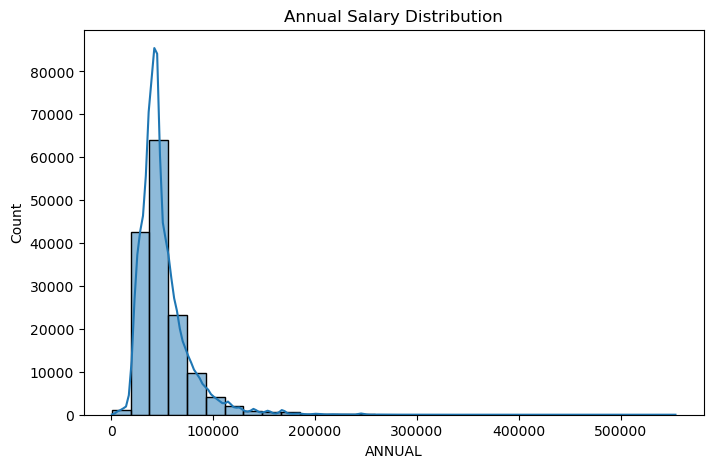

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(df['ANNUAL'], bins=30, kde=True)
plt.title('Annual Salary Distribution')
plt.show()

In [11]:
## Gender vs Salary

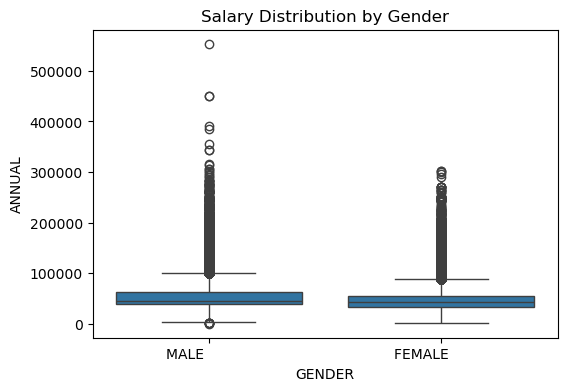

In [8]:
plt.figure(figsize=(6,4))
sns.boxplot(x='GENDER', y='ANNUAL', data=df)
plt.title('Salary Distribution by Gender')
plt.show()

In [13]:
## Department-wise average salary

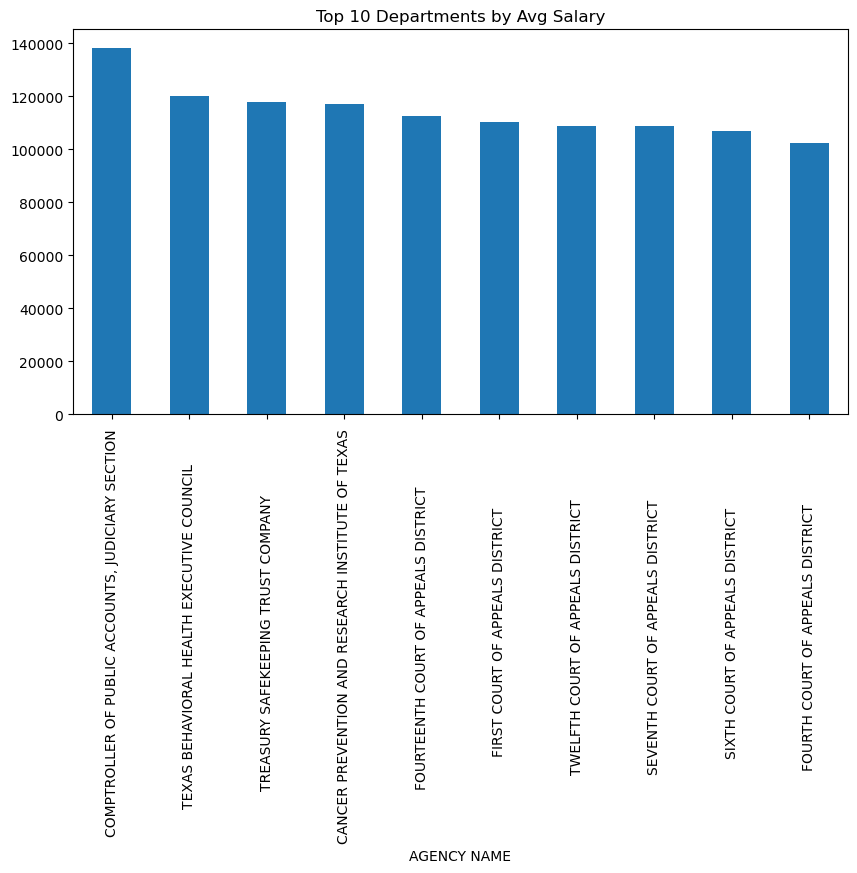

In [10]:
dept_salary = df.groupby('AGENCY NAME')['ANNUAL'].mean().sort_values(ascending=False).head(10)
dept_salary.plot(kind='bar', figsize=(10,5), title='Top 10 Departments by Avg Salary')
plt.show()

## Outlier Detection

In [11]:
Q1 = df['ANNUAL'].quantile(0.25)
Q3 = df['ANNUAL'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['ANNUAL'] < (Q1 - 1.5 * IQR)) | (df['ANNUAL'] > (Q3 + 1.5 * IQR))]
print("Number of outliers:", outliers.shape[0])

Number of outliers: 9031


## Feature Encoding

In [12]:
le = LabelEncoder()
for col in ['AGENCY NAME', 'CLASS TITLE', 'ETHNICITY', 'GENDER', 'STATUS']:
    df[col] = le.fit_transform(df[col].astype(str))

## Model Preparation

In [14]:
X = df[['AGENCY NAME', 'CLASS TITLE', 'ETHNICITY', 'GENDER', 'STATUS', 'HRS PER WK']]
y = df['ANNUAL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train Models

In [15]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}


In [16]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MAE": mae, "RMSE": rmse, "R2": r2}

## Model Comparison

In [17]:
results_df = pd.DataFrame(results).T
print("Model Comparison Report:")
print(results_df)

Model Comparison Report:
                            MAE          RMSE        R2
Linear Regression  15815.378261  23934.826891  0.108089
Decision Tree       3197.398506   7327.943482  0.916396
Random Forest       3095.078241   6925.406085  0.925329


## Conclusion

In [18]:
best_model = results_df['R2'].idxmax()
print(f"\n✅ Best Model for Salary Prediction: {best_model}")


✅ Best Model for Salary Prediction: Random Forest
